In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


An object has price, and their corresponding features: feature 1 and feature 2, and based of f1 and f2, we will predict the price.

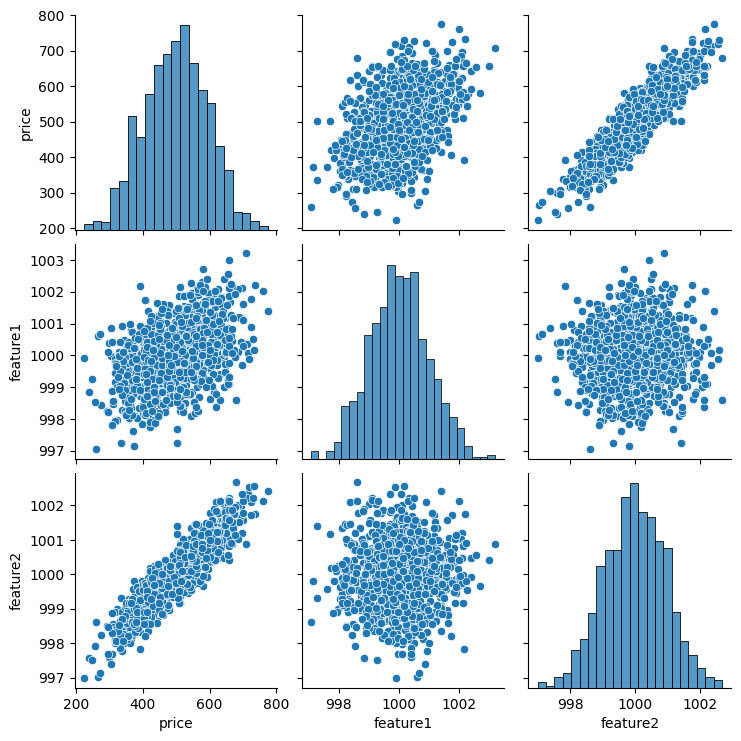

In [5]:
sns.pairplot(data = df) # feature vs price

Feature 2 vs Price , seems to have very high correletion with the actual price.

After you have explored your data, the next step is to create a test train split and we can do this from sklearn.

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X = df[['feature1', 'feature2']].values #on adding.values, it returns as a numpy array


In [12]:
y= df['price'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
X_train.shape

(700, 2)

In [15]:
X_test.shape

(300, 2)

Now normalize or scale your data because we're working w/ weights and biases inside the neural network.

In [21]:
from sklearn.preprocessing import MinMaxScaler # transform data


In [22]:
scaler = MinMaxScaler()


In [26]:
scaler.fit(X_train)

MinMaxScaler()

Fit simply calculates the parameters it needs to perform the actual scaling later on . Fit simply calculated the standard deviation, the min and max We only do it on training dataset because we want to prevent data leakage from the test set. We only fit our scalar to the training set to not try to cheat and look into the test set.

In [27]:
X_train = scaler.transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_train.max()

1.0

In [30]:
X_train.min()

0.0

## Creating Neural Network

In [33]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense

Initially what we do is create a simple sequential model and keep on adding layers to it 

In [38]:
# help(Sequential)

In [48]:
# Two ways : sequential and pass list of  actual layers, here dense layer
#Unit means: how many layers, activation function: which function they should be using

# model = Sequential([Dense(units=4, activation='relu'), 
#                     Dense(units=2, activation='relu'),
#                     Dense(units=1)])


In [49]:
# model = Sequential()
# model.add(Dense(units=4, activation='relu'))
# model.add(Dense(units=2, activation='relu'))
# model.add(Dense(units=1))

Why: Doing in seperate lines, instead of one giant list call is if i want to quickely edit or turn off the layer, you can easily comment it.

Let's say we have 3 layers w/ 4 neurons each w/ relu activation function and with this particular dataset we are trying to predict a single neuron numerical value.

In [52]:
model = Sequential()

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='rmsprop', loss='mse') #methods of optimization

In [53]:
#train and fit the model to the training data

In [61]:
model.fit(x=X_train, y=y_train, epochs=300, verbose=1) # 300: it goes via entire dataset 300 times. how to choose epochs correctly?

Epoch 1/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 24.2037
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 23.2946
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.3924 
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 23.5716
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.0268 
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 22.3719
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.3623 
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 25.0462
Epoch 9/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8430  
Epoch 10/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8879 
Epoch 11/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.2455 
Epoch 12/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 24.3694
Epoch 13/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.8700 
Epoch 14/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.4583 
Epoch 15/300
22/22 ━━━━━━━━━━━━━━━━━

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.4272 
Epoch 81/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.0072 
Epoch 82/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.6318 
Epoch 83/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 24.3029
Epoch 84/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.0258 
Epoch 85/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.4102 
Epoch 86/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.7135 
Epoch 87/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.8185 
Epoch 88/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.1155 
Epoch 89/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.8865 
Epoch 90/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.5523 
Epoch 91/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.3291 
Epoch 92/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.2376 
Epoch 93/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 26.1788
Epoch 94/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 22.8272
Epoch 159/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 24.3949
Epoch 160/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.4021 
Epoch 161/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 24.6038
Epoch 162/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.2761 
Epoch 163/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.4907 
Epoch 164/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 24.0140
Epoch 165/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.3981 
Epoch 166/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.2544 
Epoch 167/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 21.6598
Epoch 168/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.9059 
Epoch 169/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 25.1141
Epoch 170/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 21.9675
Epoch 171/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 26.4537
Epoch 172/300
22/22 ━━━━━━

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.1412 
Epoch 237/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.4724 
Epoch 238/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.2132 
Epoch 239/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.5755 
Epoch 240/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.5379 
Epoch 241/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.0100 
Epoch 242/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.1230 
Epoch 243/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.0859 
Epoch 244/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.0703 
Epoch 245/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.0334 
Epoch 246/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.4711 
Epoch 247/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.6178 
Epoch 248/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 24.7462
Epoch 249/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.7498 
Epoch 250/300
22/22 ━━━━━━━━━━━━━

In [62]:
model.history.history


{'loss': [24.29224395751953,
  24.07286834716797,
  24.25147247314453,
  24.194562911987305,
  24.00682258605957,
  24.2220458984375,
  23.98829460144043,
  24.20624542236328,
  23.995933532714844,
  24.31904411315918,
  24.51769256591797,
  24.1033992767334,
  24.16156578063965,
  24.129077911376953,
  24.293420791625977,
  24.5478458404541,
  24.337221145629883,
  24.281322479248047,
  24.191322326660156,
  23.82353401184082,
  24.424272537231445,
  24.131868362426758,
  24.182451248168945,
  24.414348602294922,
  24.062761306762695,
  24.123210906982422,
  23.897247314453125,
  24.054840087890625,
  24.213537216186523,
  23.994295120239258,
  24.28901481628418,
  24.356651306152344,
  24.108875274658203,
  24.471172332763672,
  24.006866455078125,
  24.42939567565918,
  23.8347110748291,
  24.338045120239258,
  24.070232391357422,
  24.275468826293945,
  24.2548885345459,
  24.722301483154297,
  24.29363250732422,
  24.284948348999023,
  24.440940856933594,
  24.340303421020508,
  2

In [63]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

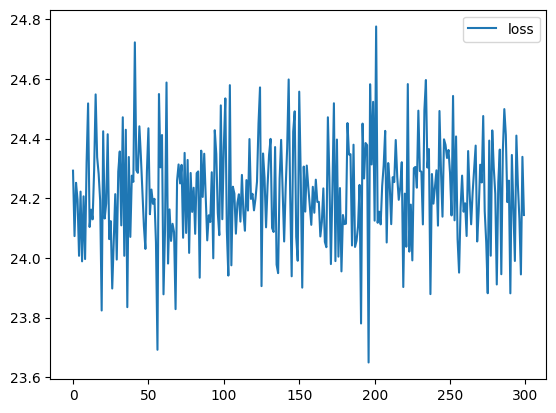

In [64]:
loss_df.plot()